<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Marketing_chap_7_EDA_for_customer_behavior_(expand%20IBM_data_chap_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load basic library
import re
import numpy as np
import time
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats

# import require packages for plotting
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#file='/content/drive/My Drive/Data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv'
file='https://raw.githubusercontent.com/pthiagu2/DataMining/master/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv'
df = pd.read_csv(file)
print(df.shape)
df.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df['conversion'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,conversion
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


# Analytics on Engaged Customers

As you can see from this data, there is a column named Response, which contains
information about whether a customer responded to the marketing efforts. Also, the Renew
Offer Type and Sales Channel columns represent the type of the renewal offer
presented to the customer and which sales channel was used to contact the customer. There
are numerous other columns that represent the socio-economic backgrounds of the
customers and types of insurance coverage that the customers currently have. We will be
utilizing this information to analyze and understand the customer behavior better,
especially in regards to their responses and engagement with the marketing and sales
efforts.

Analytics on engaged customers
Now that we have loaded the data into our Python environment, we are going to analyze it
to understand how different customers behave and react to different marketing strategies.
We are going to follow these steps:
1. Overall engagement rate
2. Engagement rates by offer type
3. Engagement rates by offer type and vehicle class
4. Engagement rates by sales channel
5. Engagement rates by sales channel and vehicle size

## Overall Engagement Rate

In [ ]:
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

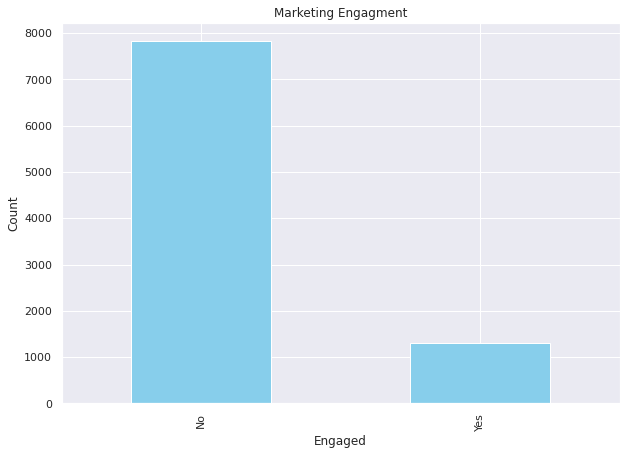

In [ ]:

ax = df.groupby('Response').count()['Customer'].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Marketing Engagment'
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [ ]:
df['Response'].value_counts(normalize=True)

No     0.856799
Yes    0.143201
Name: Response, dtype: float64

## Engagement Rates by Offer Type

In [ ]:
by_offer_type_df = 
df.loc[df['Response'] == 'Yes'].groupby(['Renew Offer Type']).count()['Customer']\
/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

In [ ]:
by_offer_type_df.index

Index(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype='object', name='Renew Offer Type')

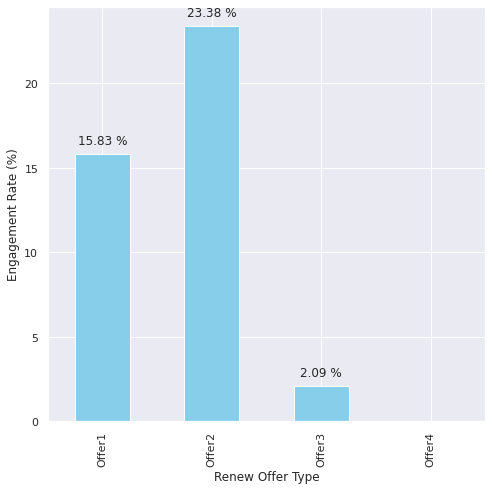

In [ ]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')
#---Label------
x=range(len(by_offer_type_df.index))
y=by_offer_type_df.values*100

for x,y in zip(x,y):
    label = "{:.2f} %".format(y)
    plt.annotate(label, # this is the text
                (x,y), # this is the point to label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # 
plt.tight_layout()
plt.show()

In [ ]:
def conversion(name):
  conversion_rate_by_marital = df.groupby(by=name)['conversion'].sum() \
  / df.groupby(by=name)['conversion'].count() * 100.0
  conversion_rate_by_marital=pd.DataFrame(conversion_rate_by_marital)
  x=conversion_rate_by_marital.index
  y=conversion_rate_by_marital.conversion

  plt.figure(figsize=(10,5))
  plt.bar(x,y,color='skyblue')
  #plt.title('conversions_by_'+ name)
  plt.xlabel('conversions_by_'+ name)
  plt.ylabel('Conversion Rate (%)')
  plt.xticks(rotation='vertical')

  for x,y in zip(x,y):
      label = "{:.2f} %".format(y)
      plt.annotate(label, # this is the text
                  (x,y), # this is the point to label
                  textcoords="offset points", # how to position the text
                  xytext=(0,10), # distance from text to points (x,y)
                  ha='center') # 
  plt.tight_layout()
  plt.show()

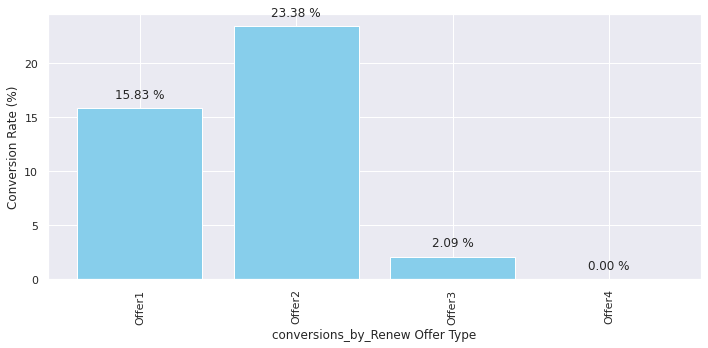

In [ ]:
conversion('Renew Offer Type')

## Offer Type & Vehicle Class

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,conversion
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [ ]:
df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    264
                  Luxury Car         6
                  Luxury SUV        18
                  SUV              168
                  Sports Car        42
                  Two-Door Car      96
Offer2            Four-Door Car    336
                  Luxury Car         6
                  Luxury SUV        12
                  SUV              120
                  Sports Car        48
                  Two-Door Car     162
Offer3            Four-Door Car     24
                  Two-Door Car       6
Name: Customer, dtype: int64

In [ ]:
df.groupby('Renew Offer Type').count()['Customer']

Renew Offer Type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Customer, dtype: int64

In [ ]:

by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [ ]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


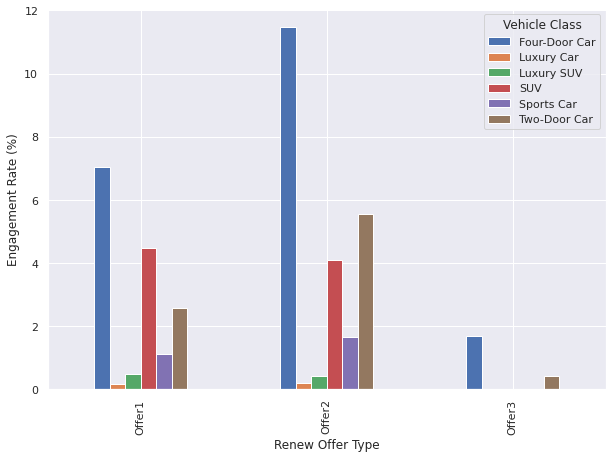

In [ ]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

## Note: Cách tính toán ở đây sai, xem cách ở dưới

không thể lấy lượng engagement của từng loại xe chia cho tổng loại xe mà phải lấy lượng engagement của từng loại xe chia cho số lượng khảo sát từng loại xe đó (vì lượng xe nhiều nhưng engagement ít sẽ chiếm tỉ trong yes rất cao)

In [ ]:
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']/df.groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']

by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.146912
                  Luxury Car       0.088235
                  Luxury SUV       0.202247
                  SUV              0.188341
                  Sports Car       0.185022
                  Two-Door Car     0.141384
Offer2            Four-Door Car    0.219178
                  Luxury Car       0.146341
                  Luxury SUV       0.255319
                  SUV              0.250000
                  Sports Car       0.311688
                  Two-Door Car     0.241431
Offer3            Four-Door Car    0.032215
                  Luxury Car            NaN
                  Luxury SUV            NaN
                  SUV                   NaN
                  Sports Car            NaN
                  Two-Door Car     0.021053
Offer4            Four-Door Car         NaN
                  Luxury Car            NaN
                  Luxury SUV            NaN
                  SUV                   NaN


In [ ]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.146912,0.088235,0.202247,0.188341,0.185022,0.141384
Offer2,0.219178,0.146341,0.255319,0.250000,0.311688,0.241431
Offer3,0.032215,0.000000,0.000000,0.000000,0.000000,0.021053
Offer4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


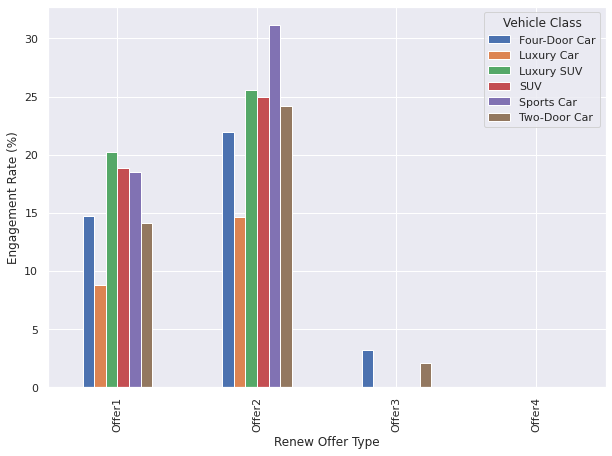

In [ ]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

## Engagement Rates by Sales Channel

In [ ]:
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

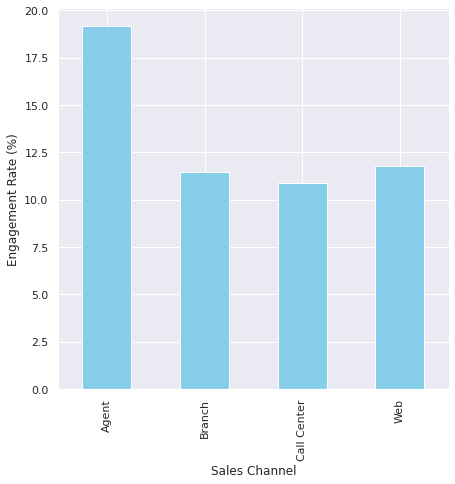

In [ ]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

## Sales Channel & Vehicle Size

In [ ]:
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


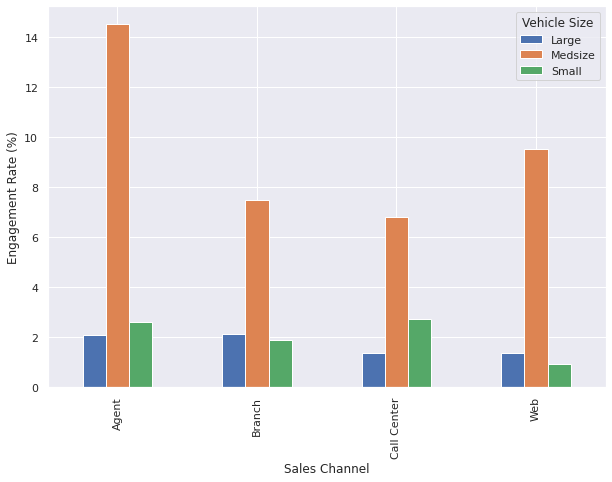

In [ ]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

## Cách này sai, xem cách dưới:

In [ ]:
df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']

Sales Channel  Vehicle Size
Agent          Large            72
               Medsize         504
               Small            90
Branch         Large            54
               Medsize         192
               Small            48
Call Center    Large            24
               Medsize         120
               Small            48
Web            Large            18
               Medsize         126
               Small            12
Name: Customer, dtype: int64

In [ ]:
df.groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']

Sales Channel  Vehicle Size
Agent          Large            341
               Medsize         2471
               Small            665
Branch         Large            291
               Medsize         1780
               Small            496
Call Center    Large            185
               Medsize         1218
               Small            362
Web            Large            129
               Medsize          955
               Small            241
Name: Customer, dtype: int64

In [ ]:
by_sales_channel_df  = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']/df.groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']

by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.211144,0.203966,0.135338
Branch,0.185567,0.107865,0.096774
Call Center,0.129730,0.098522,0.132597
Web,0.139535,0.131937,0.049793


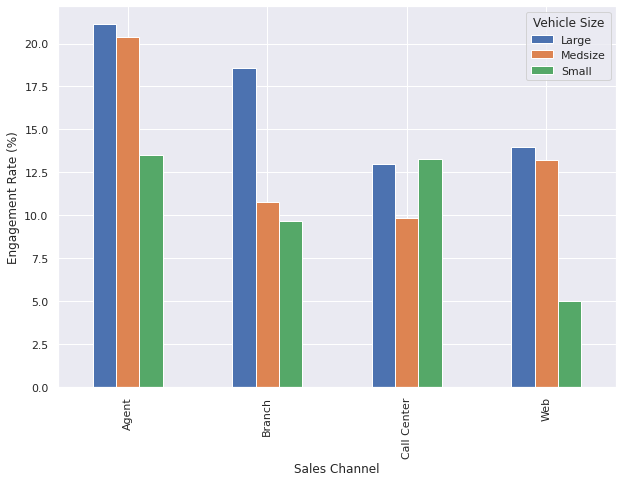

In [ ]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

## Engagement Rates by Months Since Policy Inception

In [ ]:
by_months_since_inception_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
    by='Months Since Policy Inception'
)['Response'].count() / df.groupby(
    by='Months Since Policy Inception'
)['Response'].count() * 100.0

by_months_since_inception_df.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
        ...    
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.692308
Name: Response, Length: 100, dtype: float64

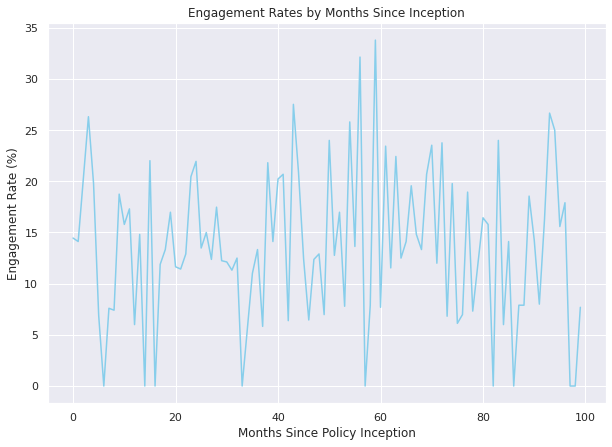

In [ ]:

ax = by_months_since_inception_df.fillna(0).plot(
    figsize=(10, 7),
    title='Engagement Rates by Months Since Inception',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')

plt.show()

# Customer Segmentation by CLV & Months Since Policy Inception

In [ ]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [ ]:
df['CLV Segment'] = df['Customer Lifetime Value'].apply(
    lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low'
)
df['CLV Segment'] 

0        Low
1       High
2       High
3       High
4        Low
        ... 
9129    High
9130     Low
9131    High
9132    High
9133     Low
Name: CLV Segment, Length: 9134, dtype: object

In [ ]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [ ]:

df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low'
)

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,conversion,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,High,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,High,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,Low,Low


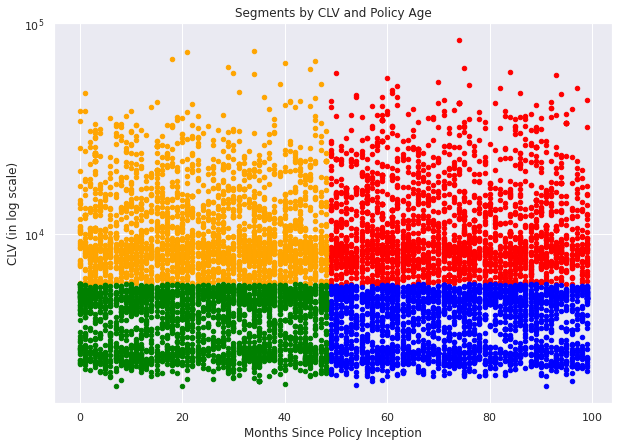

In [ ]:
ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='red'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='blue'
)

df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='orange'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='green',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

In [ ]:
df.loc[
    df['Response'] == 'Yes'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']

CLV Segment  Policy Age Segment
High         High                  312
             Low                   306
Low          High                  366
             Low                   324
Name: Customer, dtype: int64

In [ ]:
df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']

CLV Segment  Policy Age Segment
High         High                  2249
             Low                   2317
Low          High                  2253
             Low                   2315
Name: Customer, dtype: int64

In [ ]:

engagment_rates_by_segment_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']/df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']

engagment_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

In [ ]:
engagment_rates_by_segment_df.unstack()*100.0

Policy Age Segment,High,Low
CLV Segment,,
High,13.872832,13.206733
Low,16.245007,13.995680


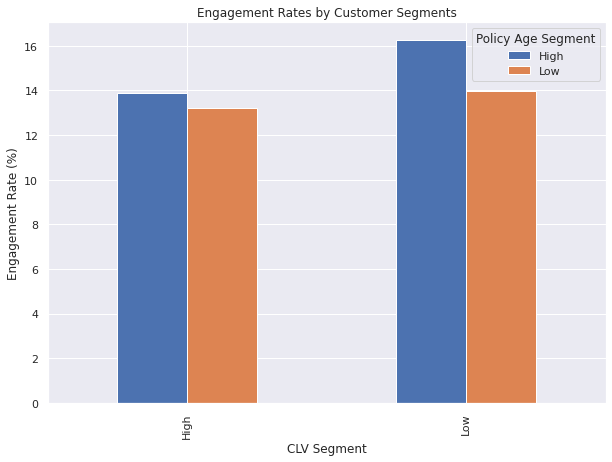

In [ ]:
ax = (engagment_rates_by_segment_df.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()